In [14]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from agent import build_langgraph_rag
from IPython.display import Image, display
import base64
import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(parent_dir)

from retriever import load_hybrid_retriever
from retriever import load_hybrid_retriever

import warnings

# Ignore uniquement les warnings de dépréciation LangChain
warnings.filterwarnings("ignore")

load_dotenv()

True

In [4]:
llm = ChatOpenAI(
        api_key=os.getenv("OPENAI_API_KEY"),
        model="gpt-4o",
        temperature=0.1)

retriever = load_hybrid_retriever(
        index_path="../../vectorstore/faiss_vectorestore_v2",
        pickle_path="../../vectorstore/documents_v2.pkl",
        model_path="../../bge-m3"
    )

In [15]:
compiled_graph = build_langgraph_rag(retriever, llm)  

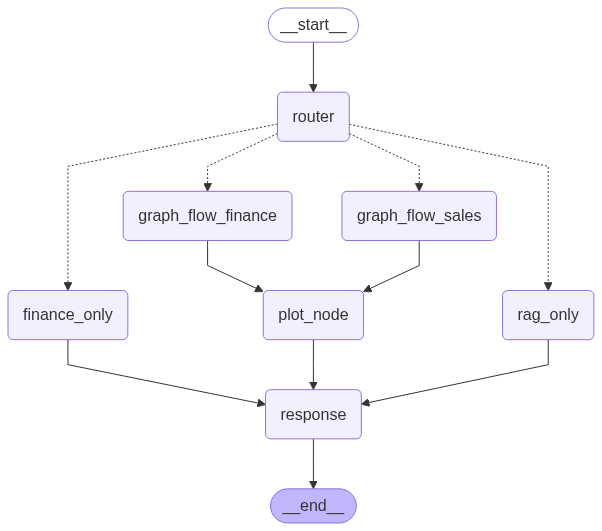

In [9]:
Image(compiled_graph.get_graph().draw_mermaid_png())

Router decision: graph_flow_sales
Current route: graph_flow_sales


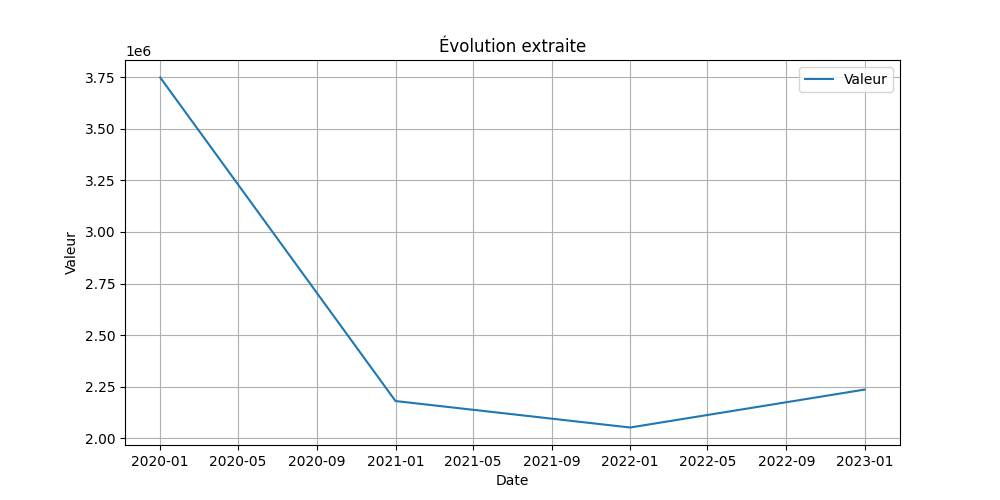

In [12]:
result = compiled_graph.invoke({"question": "Create a graph illustrating the number of vehicles sold per year from 2020 onwards."})
print(result['final_response'])

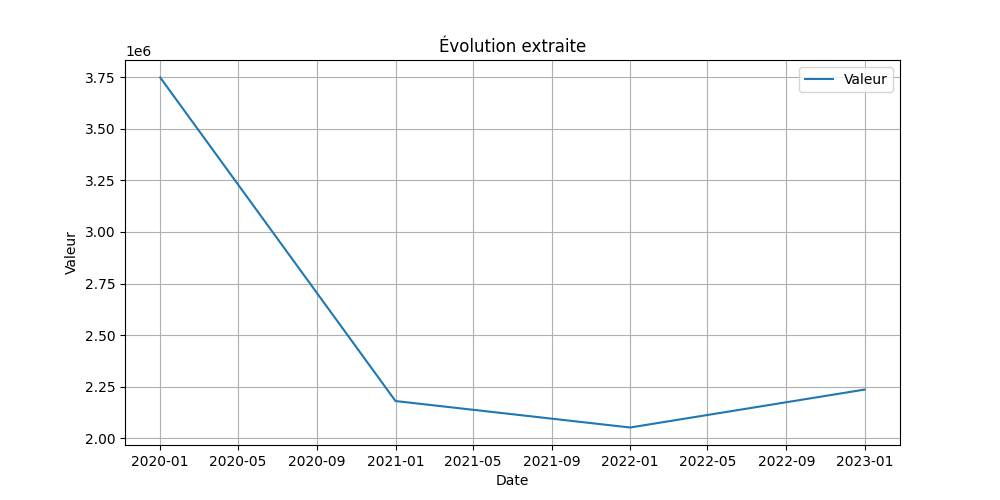

In [13]:
base64_data = result['final_response']  # ou ta variable encodée
display(Image(data=base64.b64decode(base64_data.split(",")[1])))